In [1]:
import numpy as np
import pandas as pd
import tabula as tb
import glob as g
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import plotly.express as px

In [2]:
texto=open('vale.csv').read()

In [3]:
stopwords= set(STOPWORDS)
new_words = []
with open("stopwords.txt", 'r', encoding='utf-8') as f:
    [new_words.append(word) for line in f for word in line.split()]
new_stopwords = stopwords.union(new_words)

In [4]:
wc=WordCloud(background_color='White',stopwords=new_stopwords, width=900, height=600, colormap='viridis',collocation_threshold=10).generate(texto)

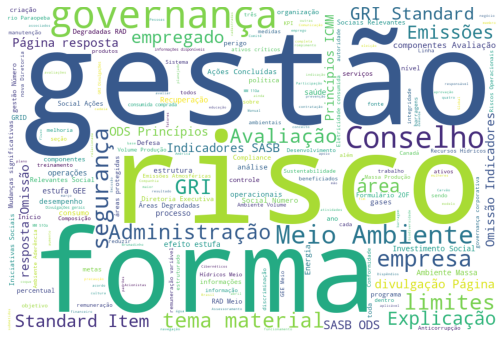

In [5]:
fig, ax= plt.subplots(figsize=(9,6))
ax.imshow(wc, interpolation='bilinear')
ax.set_axis_off()
plt.imshow(wc)
plt.savefig('wc_vale.png')

In [6]:
palavras=wc.process_text(texto)
palavras=pd.DataFrame.from_dict(palavras, orient='index')
palavras.sort_values(ascending=False, by=0,inplace=True)
palavras.reset_index(inplace=True)
palavras.columns=('nomes','valores')
palavras

,nomes,valores
0,gestão,31
1,risco,28
2,forma,26
3,governança,17
4,Meio Ambiente,15
...,...,...
893,TAP Aporte,1
894,Corpo AMIG,1
895,financeiros ribeirinhos,1
896,indenizações emergenciais,1


In [7]:
x=palavras["nomes"][:20]
y=palavras['valores'][:20]
fig= px.bar(x=x, y=y,text=y,)
fig.update_layout()
fig.show()

In [20]:
a=wc.random_state
a